# Advanced Classification Hackathon Challenge

© Explore Data Science Academy

## Honour Code

I **Boitemogelo Tagane**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

## Imports

In [38]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing packages for data cleaning and feature engineering
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

#Importing packages for model building


In [39]:
# import dataset 
df_train = pd.read_csv(r"C:\Users\Temo\Documents\EXPLORE\Sprints\6. Advanced Classification\13. Hackathon Exam\south-african-language-identification-hack-2023\train_set.csv")
df_test = pd.read_csv(r"C:\Users\Temo\Documents\EXPLORE\Sprints\6. Advanced Classification\13. Hackathon Exam\south-african-language-identification-hack-2023\test_set.csv")

In [40]:
df_train.shape

(33000, 2)

### Taking a look at the data

In [116]:
#Looking at the data by showing first 5 rows in train data
df_train.head()

,lang_id,text
0,xho,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,province kwazulu natal department transport in...
3,nso,netefat gore ba file dilo ka moka e le dumelel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [117]:
#Looking at the data by showing first 5 rows in train data

df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [118]:
#Looking at the data types in train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29901 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  29901 non-null  object
 1   text     29901 non-null  object
dtypes: object(2)
memory usage: 700.8+ KB


In [119]:
#Checking for null values in train data
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

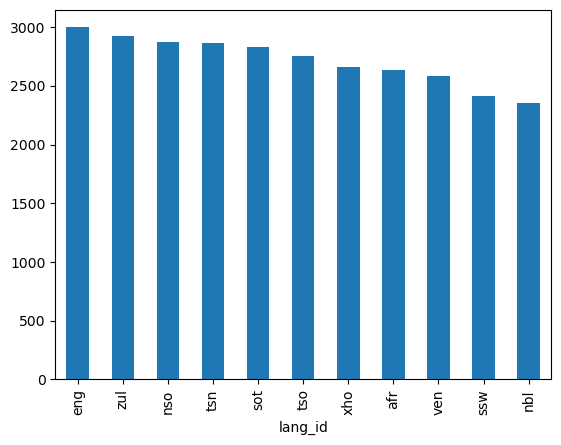

In [120]:
#Checking the values counts in the train dataset
df_train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

## Data Cleaning

In [121]:
def clean_text(text):
    # Remove non-alphabetic characters, replacing them with a space
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Convert text to lowercase for consistency
    text = text.lower()
    
    # Tokenize the text and remove stop words
    # Note: stopwords.words('english') provides a list of common English stop words
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    
    return text


In [122]:
# Apply the clean_text function to the 'text_column' in the DataFrame
df_train['text'] = df_train['text'].apply(clean_text)

In [123]:
#Removing punctiotion
def remove_punctuation(text):
    return ''.join([l for l in post if l not in string.punctuation])

In [124]:
# Apply the clean_text function to the 'text_column' in the DataFrame
df_train['text'] = df_train['text'].apply(clean_text)

In [125]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = df_train[df_train.duplicated()]

# Display the duplicate rows (if any)
print("Duplicate Rows (entire DataFrame):")
print(duplicate_rows)

Duplicate Rows (entire DataFrame):
      lang_id                                               text
20885     nbl  ngaphambi kokubethwa komthetho ka womthethosis...


In [126]:
def remove_duplicates(data):
    """
    This function takes in the dataframe and drops duplicates then return data with dropped duplicates.
    """
    print("Shape before dropping duplicates: {} ".format(data.shape))
    data = data.drop_duplicates()
    print('Shape after dropping duplicates: {}'.format(data.shape))
    return data

In [127]:
df_train = remove_duplicates(df_train)

Shape before dropping duplicates: (29901, 2) 
Shape after dropping duplicates: (29900, 2)


In [128]:
#print(df_train.duplicated)

In [129]:
def token_lem(text):
    """Tokenizes and lemmatizes the input text and returns the transformed text."""
    
    # Tokenize and lemmatize each word in the input text
    lem_tokens = [WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)]
   
    # Join the lemmatized tokens into a single string and return the result
    return ' '.join(lem_tokens)

In [130]:
df_train['text'] = df_train['text'].apply(token_lem)

## Feature Engineering

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine fitting and transforming for the training data
tfidf_vect = TfidfVectorizer()
train_vect = tfidf_vect.fit_transform(df_train['text'])

# Transform the test data
test_vect = tfidf_vect.transform(df_test['text'])

# Alternatively, use a Pipeline
#from sklearn.pipeline import Pipeline
#pipeline = Pipeline([('tfidf_vect', TfidfVectorizer()), ('classifier', YourClassifier())])
#train_vect = pipeline.fit_transform(df_train['text'], df_train['target'])
#test_vect = pipeline.transform(df_test['text'])

In [132]:
from sklearn.model_selection import StratifiedKFold, train_test_split


X_train, X_test, y_train, y_test = train_test_split(train_vect, df_train['lang_id'], random_state=45, test_size=0.2)

## Modeling

### Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [134]:
log_reg = LogisticRegression()   # Calling the Logistic Regression Model

In [135]:
log_reg.fit(X_train, y_train) #Fitting the model

LogisticRegression()

In [136]:
# Generate predictions
y_pred = log_reg.predict(X_test)

In [137]:
# Classification report
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       489
         eng       1.00      1.00      1.00       645
         nbl       0.99      0.98      0.99       454
         nso       1.00      1.00      1.00       590
         sot       1.00      1.00      1.00       554
         ssw       0.99      0.99      0.99       462
         tsn       1.00      1.00      1.00       571
         tso       1.00      1.00      1.00       524
         ven       1.00      1.00      1.00       520
         xho       0.99      0.99      0.99       554
         zul       0.98      0.99      0.98       617

    accuracy                           0.99      5980
   macro avg       0.99      0.99      0.99      5980
weighted avg       0.99      0.99      0.99      5980



### Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [140]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [141]:
y_dtpred = decision_tree.predict(X_test)

In [153]:
# Classification report
print(classification_report(y_test, y_dtpred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         afr       0.99      0.99      0.99       489
         eng       0.99      0.96      0.97       645
         nbl       0.89      0.81      0.84       454
         nso       0.97      0.97      0.97       590
         sot       0.98      0.99      0.99       554
         ssw       0.77      0.87      0.82       462
         tsn       0.97      0.95      0.96       571
         tso       0.97      1.00      0.98       524
         ven       0.99      0.99      0.99       520
         xho       0.90      0.87      0.89       554
         zul       0.85      0.86      0.85       617

    accuracy                           0.93      5980
   macro avg       0.93      0.93      0.93      5980
weighted avg       0.94      0.93      0.93      5980



In [156]:
datafr = pd.DataFrame(y_dtpred, columns=['lang_id'])
output = pd.DataFrame({'index':df_test['index']})
submission = output.join(datafr)
submission.to_csv('dt_submission.csv', index=False)

### Support Vector Machine

In [143]:
from sklearn.svm import SVC

In [144]:
svc = SVC(kernel='linear')

In [145]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [146]:
y_svcpred = svc.predict(X_test)

In [147]:
# Classification report
print(classification_report(y_test, y_svcpred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       489
         eng       1.00      1.00      1.00       645
         nbl       1.00      0.99      0.99       454
         nso       1.00      1.00      1.00       590
         sot       1.00      1.00      1.00       554
         ssw       0.99      1.00      0.99       462
         tsn       1.00      1.00      1.00       571
         tso       1.00      1.00      1.00       524
         ven       1.00      1.00      1.00       520
         xho       1.00      1.00      1.00       554
         zul       0.99      1.00      0.99       617

    accuracy                           1.00      5980
   macro avg       1.00      1.00      1.00      5980
weighted avg       1.00      1.00      1.00      5980



In [157]:
datafr2 = pd.DataFrame(y_svcpred, columns=['lang_id'])
output = pd.DataFrame({'index':df_test['index']})
submission1 = output.join(datafr2)
submission1.to_csv('svm_submission.csv', index=False)

### Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rfm = RandomForestClassifier(random_state = 42)

In [150]:
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [151]:
y_rfmpred = rfm.predict(X_test)

In [152]:
# Classification report
print(classification_report(y_test, y_rfmpred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       489
         eng       0.99      1.00      0.99       645
         nbl       0.98      0.93      0.95       454
         nso       1.00      1.00      1.00       590
         sot       1.00      1.00      1.00       554
         ssw       0.98      0.96      0.97       462
         tsn       1.00      0.99      1.00       571
         tso       1.00      1.00      1.00       524
         ven       1.00      1.00      1.00       520
         xho       0.97      0.98      0.97       554
         zul       0.94      0.97      0.95       617

    accuracy                           0.99      5980
   macro avg       0.99      0.98      0.99      5980
weighted avg       0.99      0.99      0.99      5980



In [158]:
datafr3 = pd.DataFrame(y_rfmpred, columns=['lang_id'])
output = pd.DataFrame({'index':df_test['index']})
submission3 = output.join(datafr)
submission3.to_csv('rfm_submission.csv', index=False)